
The goal of this project is to figure out what features have an impact on suicide rates and to create a linear regression model that can predict suicide rates by inputting these features and then using this data to solve the suicide problem.  Along the way we will need to clean our data, do some feature engineering, explain and display our work/findings via models and graphs.



Null Hypothesis:
There is no significant relationship between Socioeconomic and Health Indicators (collective name for independent variables) and the number of suicides.

Alternative Hypothesis:
There is a significant relationship between Socioeconomic and Health Indicators and the number of suicides.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = r"C:\Users\Hp\Downloads\suicide (2).csv"

# Reading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
print(df.head())

   Country  Year  Suicides number  Life expectancy  Adult Mortality  \
0  Albania  2000             54.0             72.6             11.0   
1  Albania  2001            119.0             73.6             14.0   
2  Albania  2002            133.0             73.3             15.0   
3  Albania  2003            124.0             72.8             18.0   
4  Albania  2004            146.0             73.0             17.0   

   Infant deaths  Alcohol  Under-five deaths  HIV/AIDS          GDP  \
0              1     3.66                  1       0.1  1175.788981   
1              1     4.25                  1       0.1  1326.973390   
2              1     3.73                  1       0.1  1453.642777   
3              1     4.29                  1       0.1   189.681557   
4              1     4.54                  1       0.1  2416.588235   

   Population  Income composition of resources  Schooling  
0     38927.0                            0.656       10.7  
1     36173.0             

In [3]:
# Dropping the "Country" and "Year" columns
df = df.drop(columns=['Country', 'Year'])

# Displaying the Dataset after dropping the columns
print(df.head())

   Suicides number  Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0             54.0             72.6             11.0              1     3.66   
1            119.0             73.6             14.0              1     4.25   
2            133.0             73.3             15.0              1     3.73   
3            124.0             72.8             18.0              1     4.29   
4            146.0             73.0             17.0              1     4.54   

   Under-five deaths  HIV/AIDS          GDP  Population  \
0                  1       0.1  1175.788981     38927.0   
1                  1       0.1  1326.973390     36173.0   
2                  1       0.1  1453.642777      3511.0   
3                  1       0.1   189.681557    339616.0   
4                  1       0.1  2416.588235    326939.0   

   Income composition of resources  Schooling  
0                            0.656       10.7  
1                            0.662       10.6  
2                   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Suicides number                  1421 non-null   float64
 1   Life expectancy                  1421 non-null   float64
 2   Adult Mortality                  1421 non-null   float64
 3   Infant deaths                    1421 non-null   int64  
 4   Alcohol                          1421 non-null   float64
 5   Under-five deaths                1421 non-null   int64  
 6   HIV/AIDS                         1421 non-null   float64
 7   GDP                              1421 non-null   float64
 8   Population                       1421 non-null   float64
 9   Income composition of resources  1421 non-null   float64
 10  Schooling                        1421 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 122.2 KB


In [5]:
df.describe()

,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,2629.177340,75.233638,116.912738,5.805067,6.664729,7.038705,0.397537,14018.867107,1.294056e+07,0.748189,13.929838
std,6755.607644,5.399686,74.413799,13.088297,3.917763,16.104082,2.227681,19697.409425,3.652156e+07,0.160380,2.462661
min,0.000000,53.700000,1.000000,0.000000,0.010000,0.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,85.000000,72.500000,68.000000,0.000000,3.540000,0.000000,0.100000,1564.966945,2.541220e+05,0.695000,12.500000
50%,501.000000,74.900000,117.000000,1.000000,6.950000,1.000000,0.100000,4622.415160,1.735275e+06,0.773000,13.800000
75%,1867.000000,78.900000,163.000000,4.000000,9.800000,5.000000,0.100000,16462.485560,7.463157e+06,0.852000,15.600000
max,56958.000000,89.000000,498.000000,111.000000,17.870000,127.000000,29.700000,119172.741800,3.000785e+08,0.948000,20.700000


In [6]:
#checking for missing values
df.isna().sum()

Suicides number                    0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Under-five deaths                  0
HIV/AIDS                           0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
#checking duplicates 
duplicates = []

def check_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('Our Dataset Has No Duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1

                 
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows constitute of {duplicates_percentage}% of the dataframe')
        

check_duplicates(df) 

Our Dataset Has No Duplicates


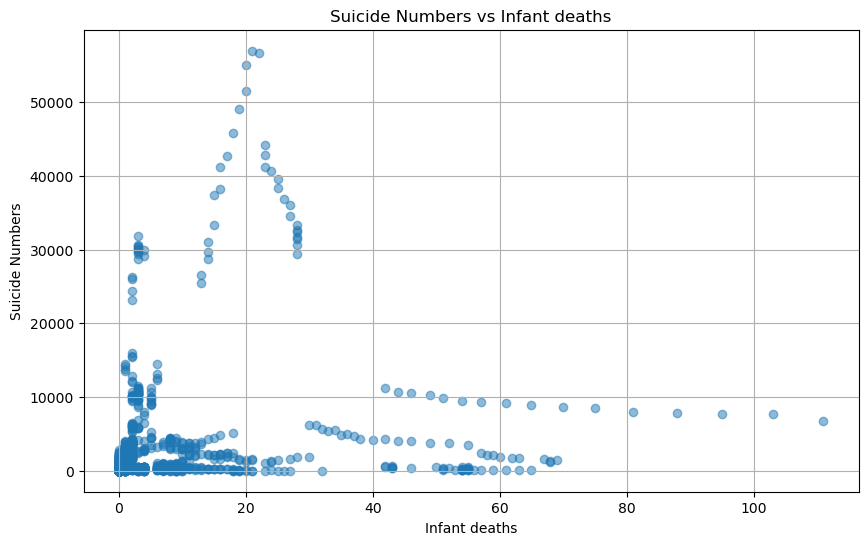

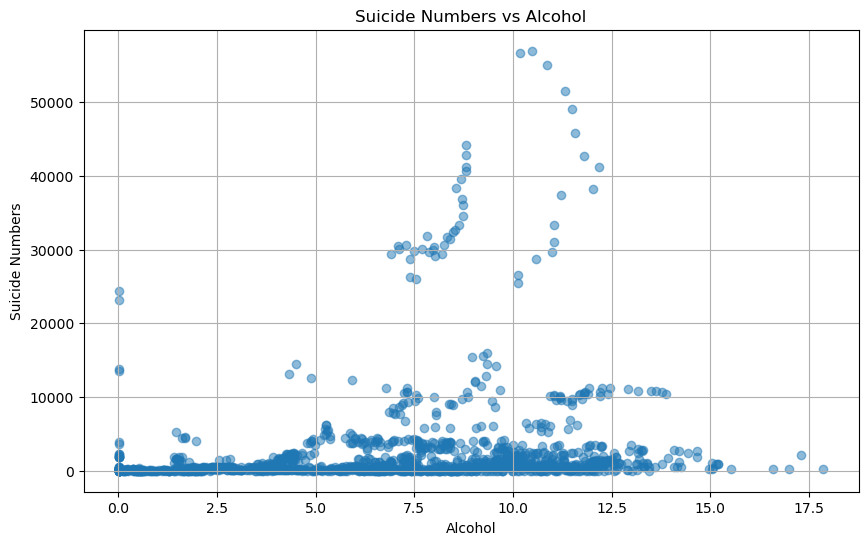

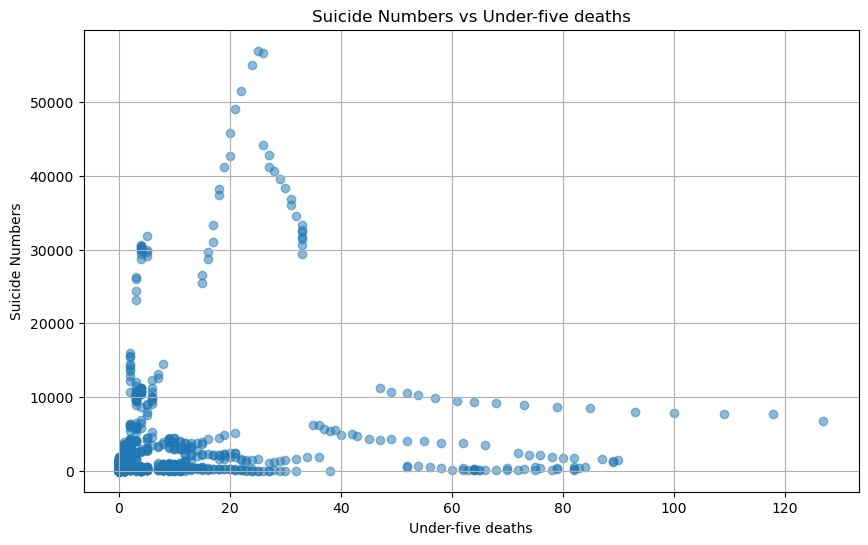

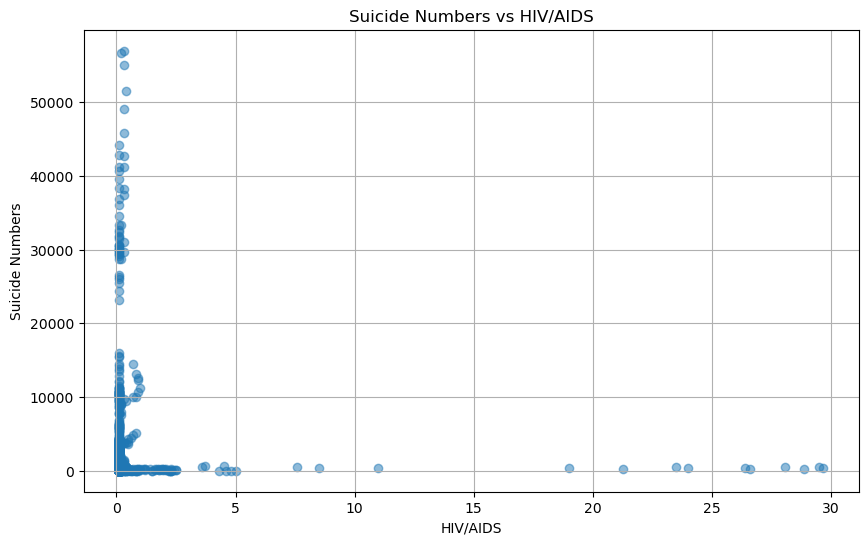

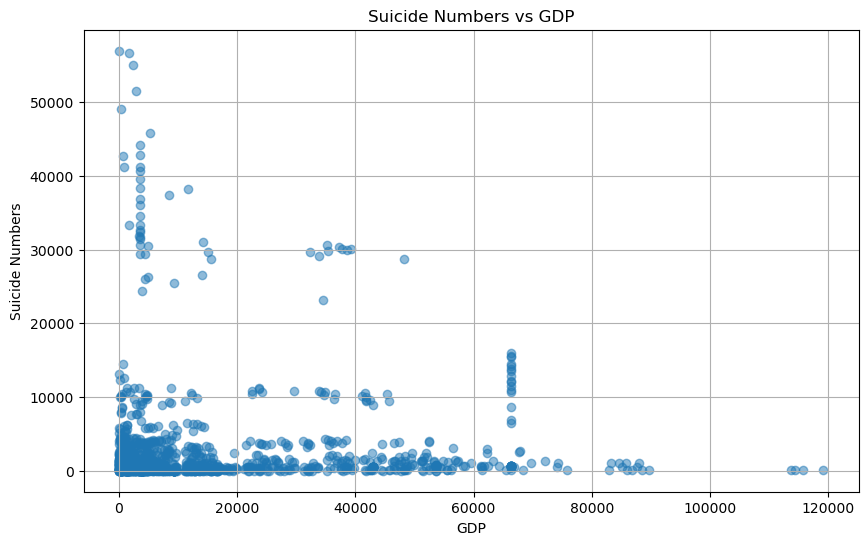

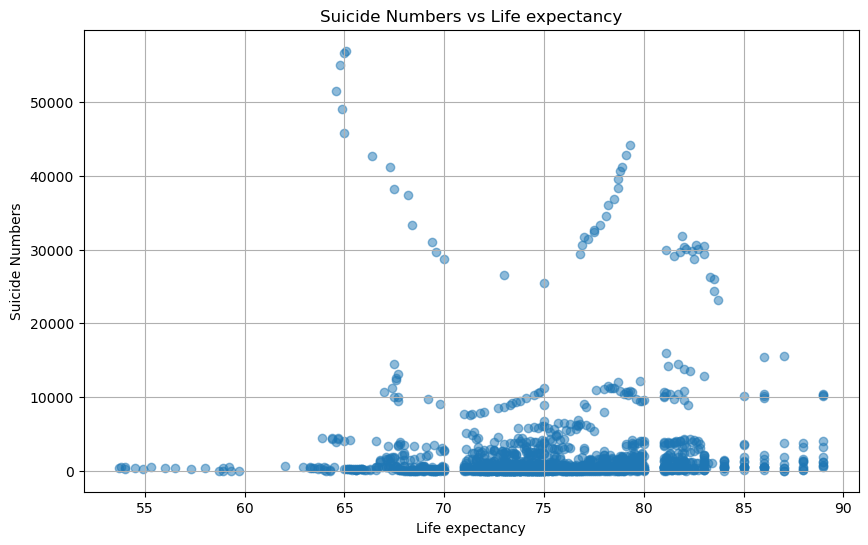

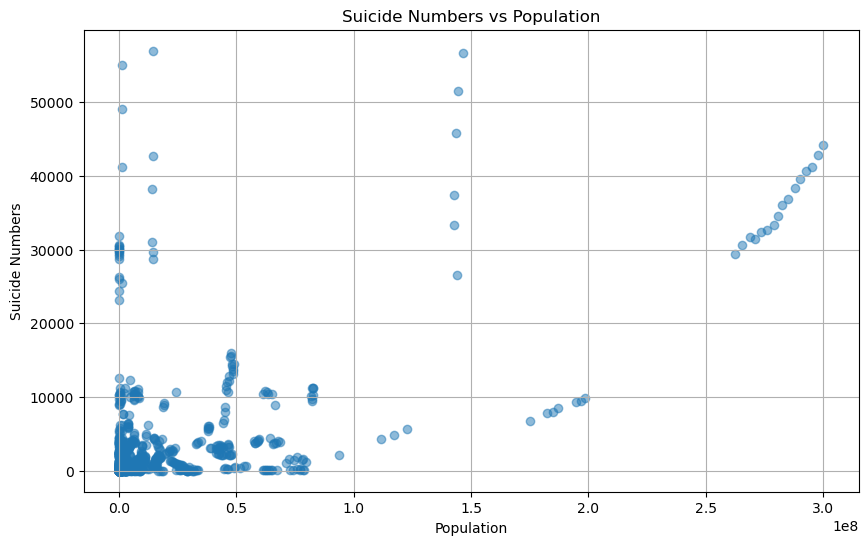

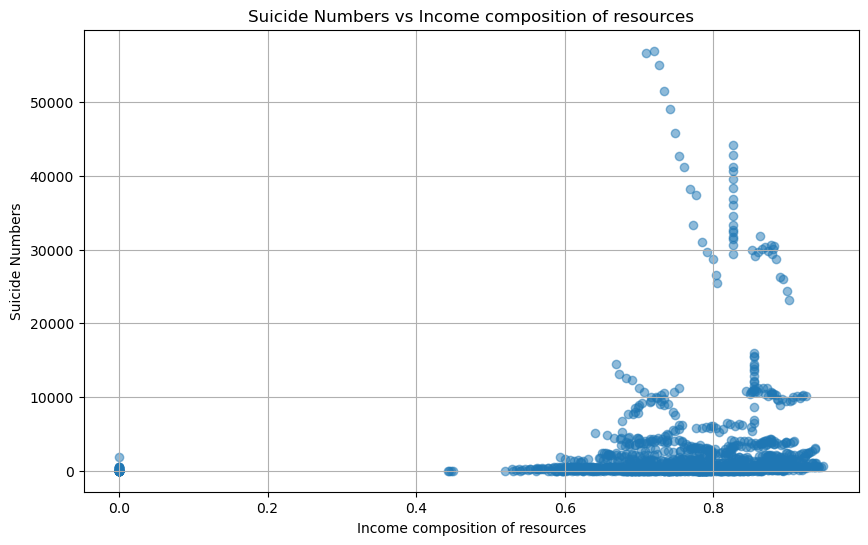

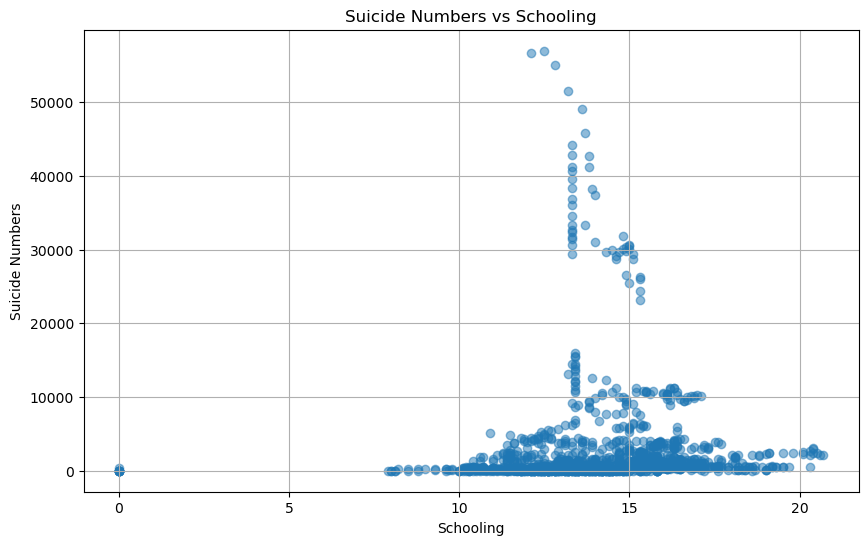

In [8]:
# variables to plot against suicide numbers
factors_to_plot = ['Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Life expectancy', 'Population', 'Income composition of resources', 'Schooling']

# Loopig through each factor to create a scatter plot
for factor in factors_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[factor], df['Suicides number'], alpha=0.5)
    plt.title(f'Suicide Numbers vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Suicide Numbers')
    plt.grid(True)
    plt.show()

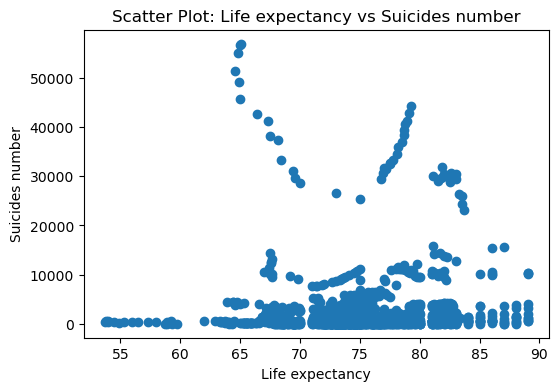

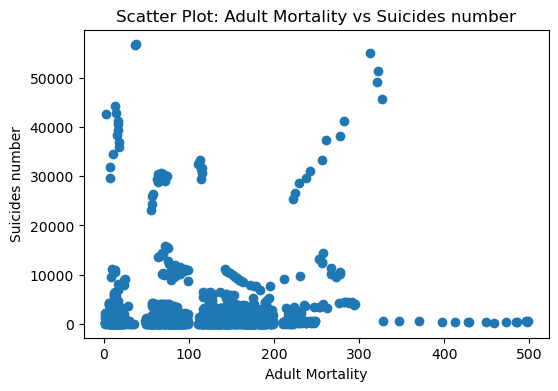

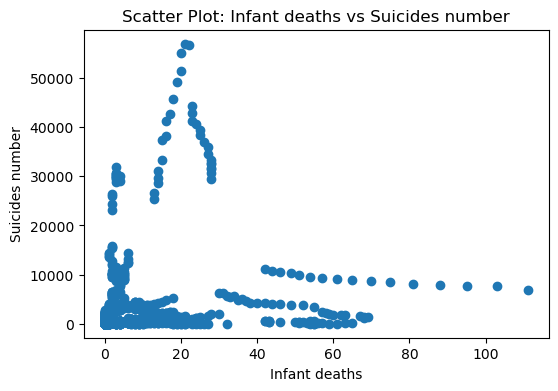

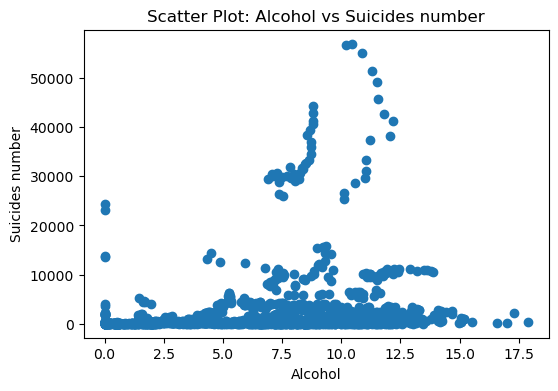

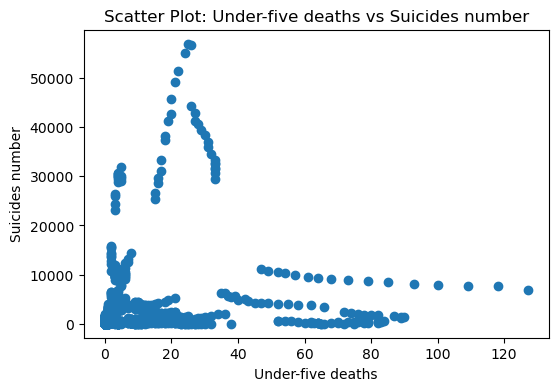

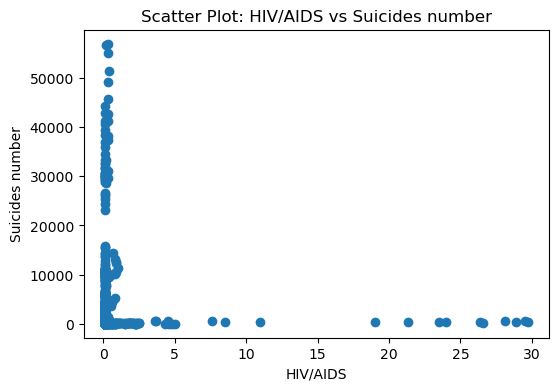

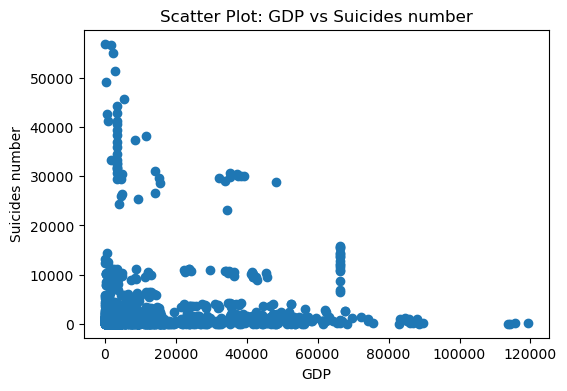

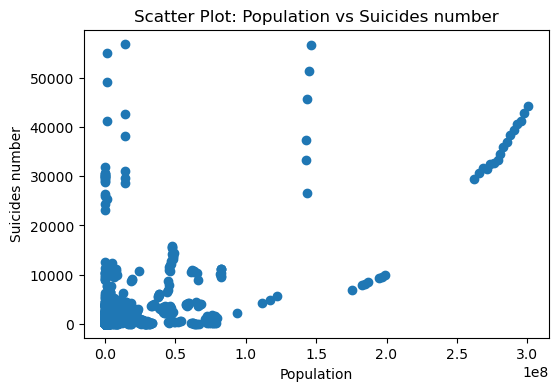

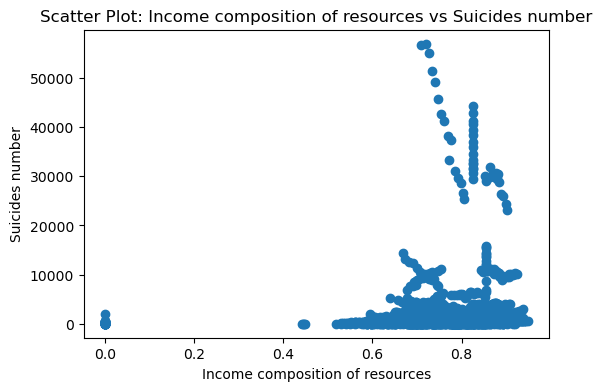

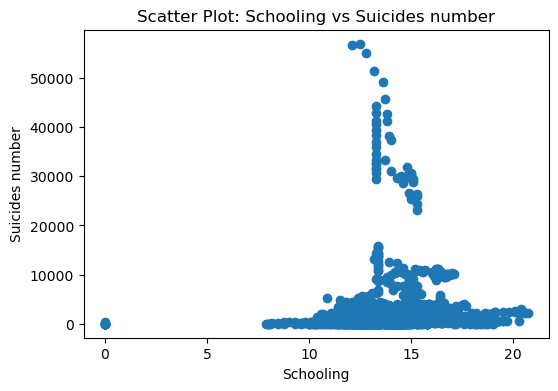

In [9]:
# Visualizing the relationship between each predictor and the target using scatter plots
X = df[['Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources', 'Schooling']]
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['Suicides number'])
    plt.title(f'Scatter Plot: {column} vs Suicides number')
    plt.xlabel(column)
    plt.ylabel('Suicides number')
    plt.show()

In [10]:
correlation_matrix = df.corr()
print(correlation_matrix['Suicides number'])

Suicides number                    1.000000
Life expectancy                    0.052473
Adult Mortality                   -0.002912
Infant deaths                      0.208265
Alcohol                            0.201657
Under-five deaths                  0.192723
HIV/AIDS                          -0.036211
GDP                                0.016293
Population                         0.585428
Income composition of resources    0.133130
Schooling                          0.066896
Name: Suicides number, dtype: float64


In [11]:
# removing outliers based on Inter Quartile Range
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the upper and lower bounds to filter outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keeping only the values within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


columns_to_remove_outliers = ['Suicides number', 'Life expectancy', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources', 'Schooling']

# removing outliers from each column
for column in columns_to_remove_outliers:
    df = remove_outliers(column)

print(df)

      Suicides number  Life expectancy  Adult Mortality  Infant deaths  \
0                54.0             72.6             11.0              1   
1               119.0             73.6             14.0              1   
2               133.0             73.3             15.0              1   
3               124.0             72.8             18.0              1   
4               146.0             73.0             17.0              1   
...               ...              ...              ...            ...   
1390            547.0             76.3            118.0              0   
1391            599.0             76.5            118.0              0   
1392            546.0             76.8            117.0              0   
1393            591.0             76.8            117.0              0   
1394            630.0             77.0            116.0              0   

      Alcohol  Under-five deaths  HIV/AIDS           GDP  Population  \
0        3.66                  1       

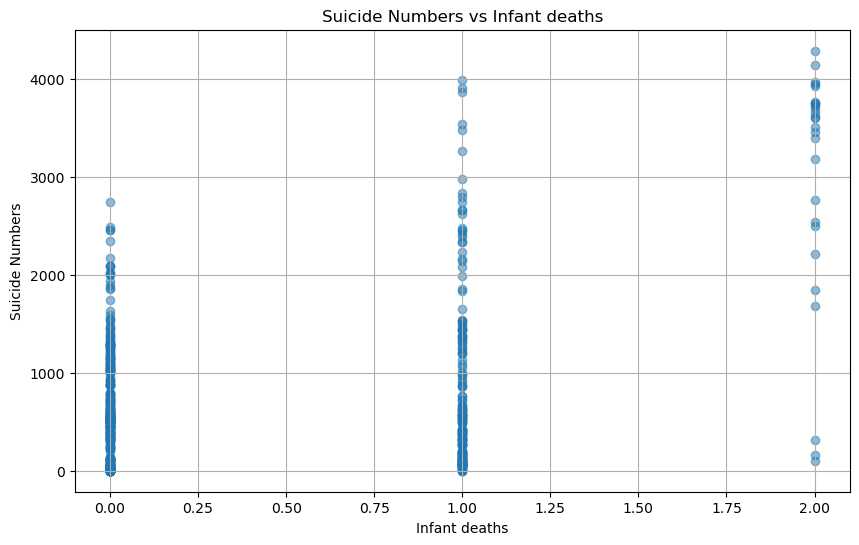

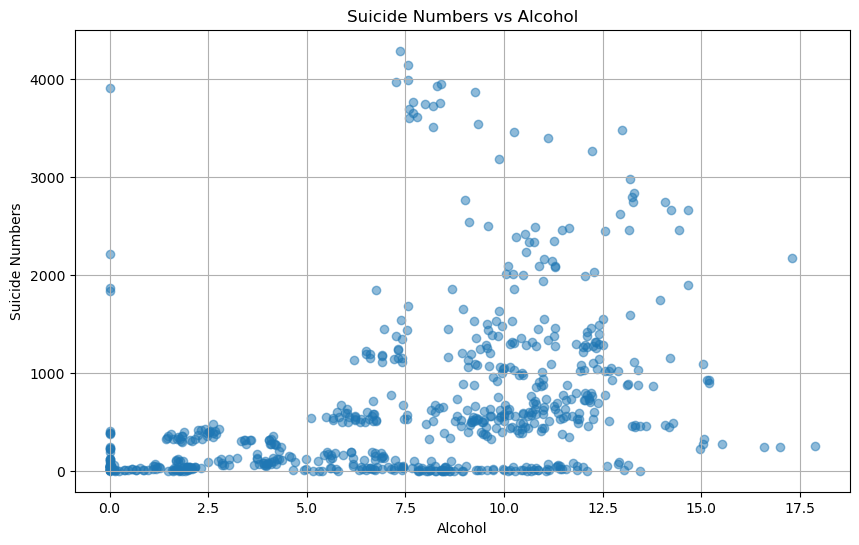

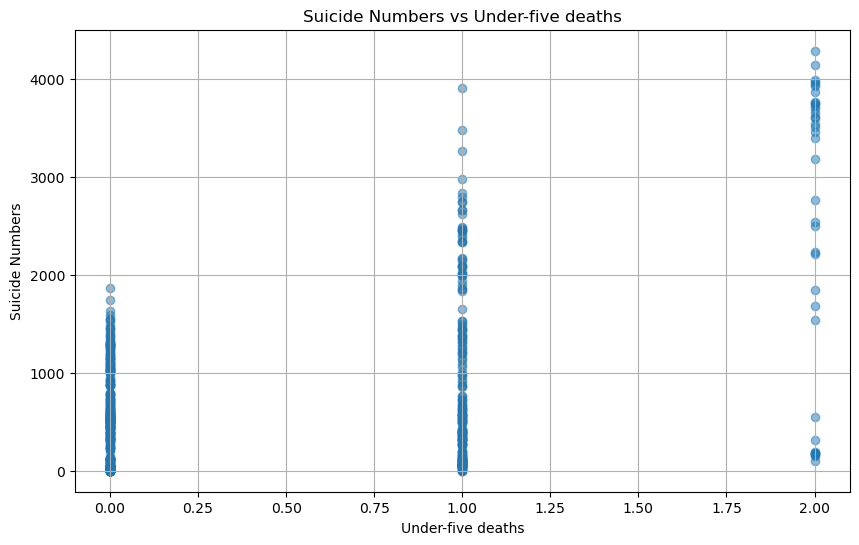

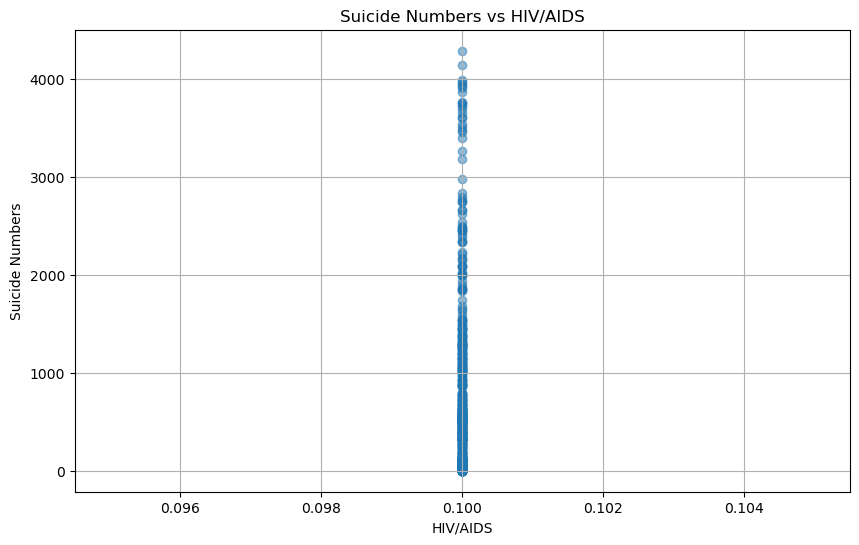

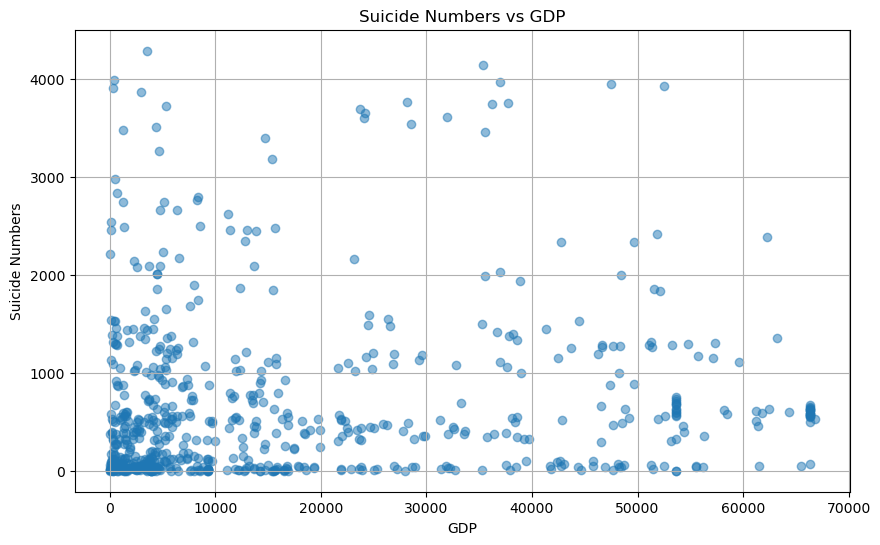

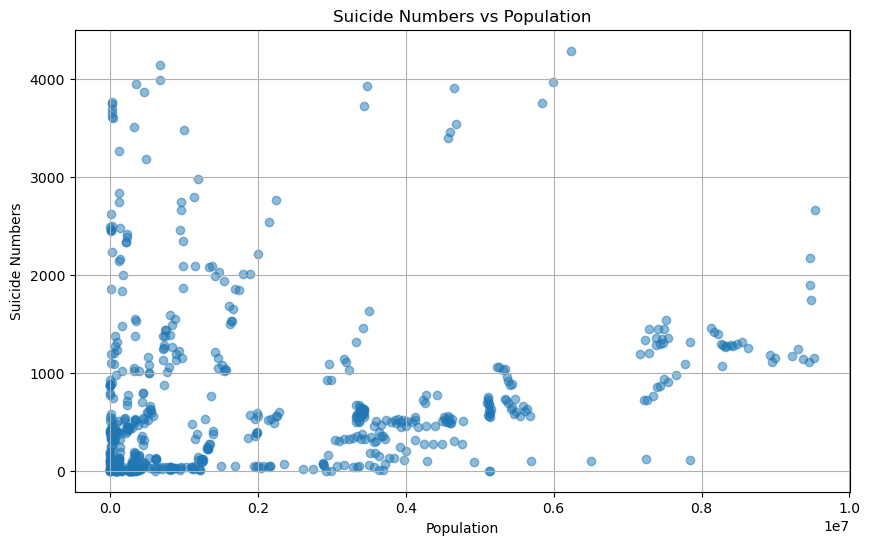

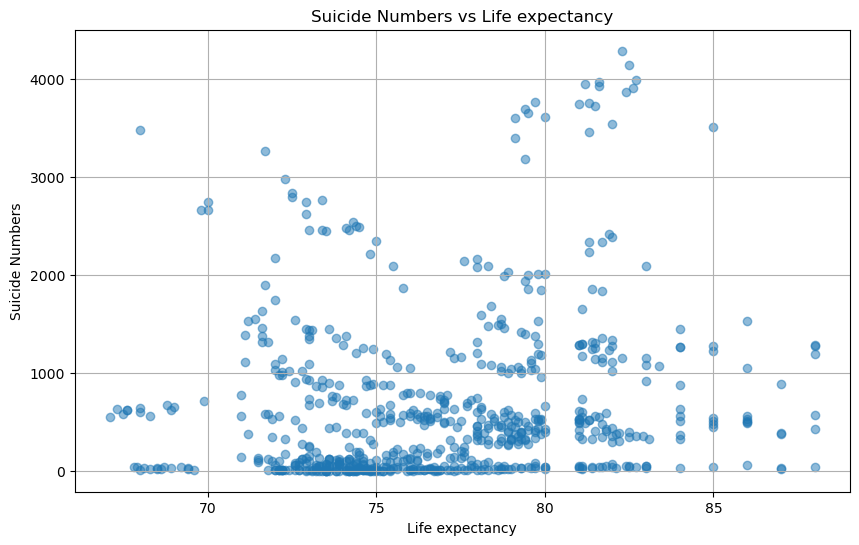

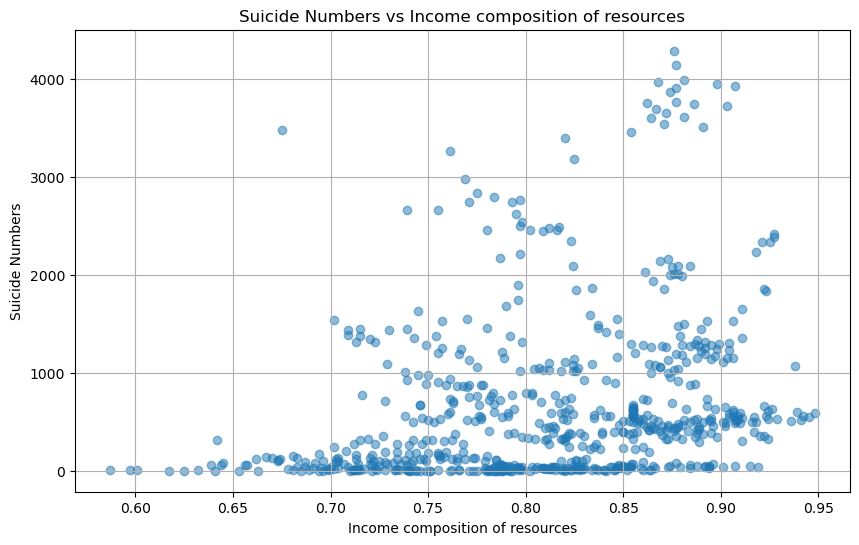

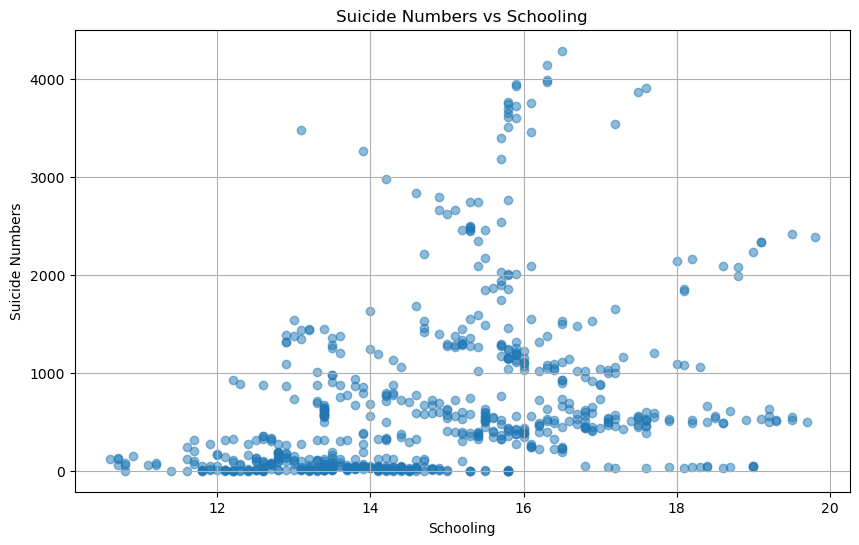

In [12]:
# variables to plot against suicide numbers
factors_to_plot = ['Infant deaths', 'Alcohol', 'Under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'Life expectancy', 'Income composition of resources', 'Schooling']

# Looping through each factor to create  scatter plots
for factor in factors_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[factor], df['Suicides number'], alpha=0.5)
    plt.title(f'Suicide Numbers vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Suicide Numbers')
    plt.grid(True)
    plt.show()

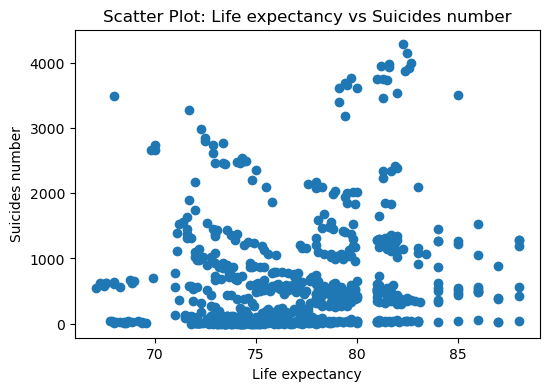

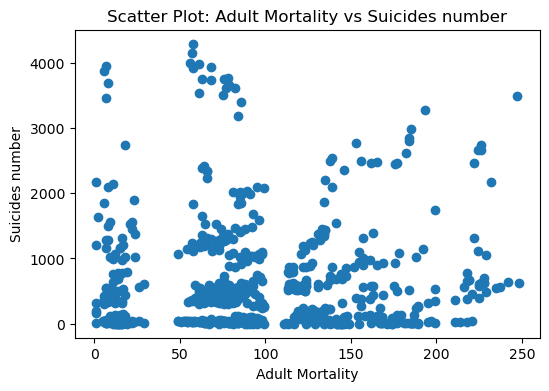

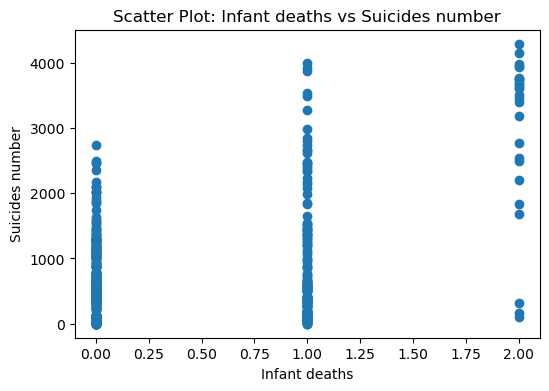

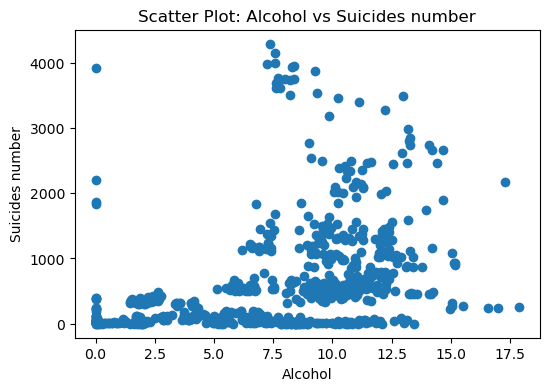

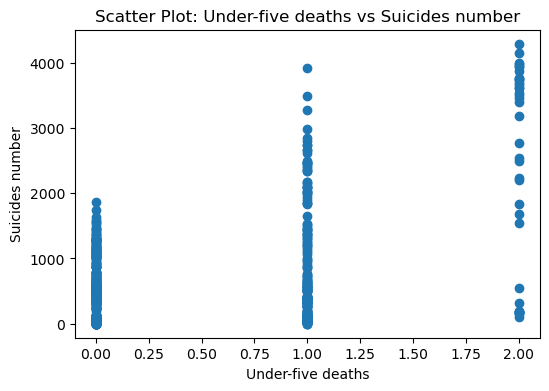

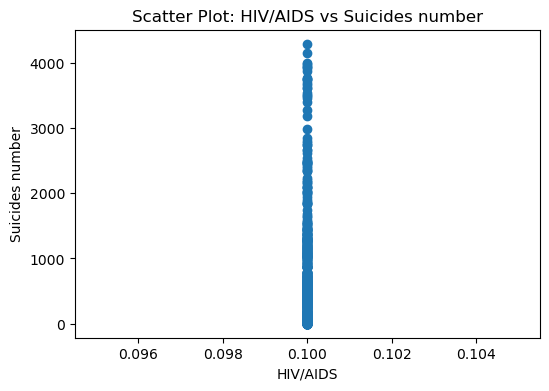

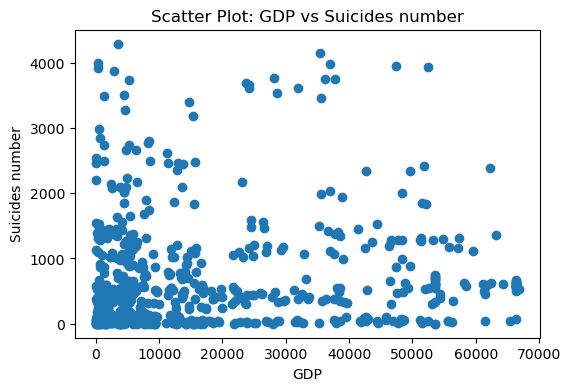

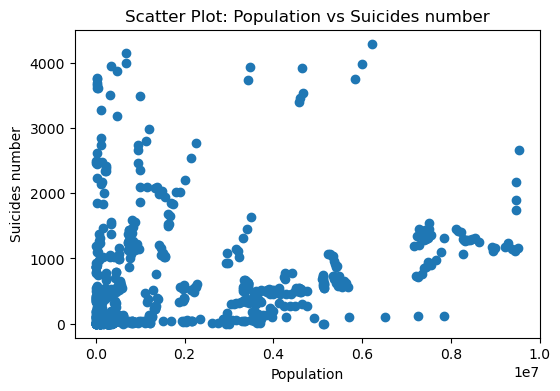

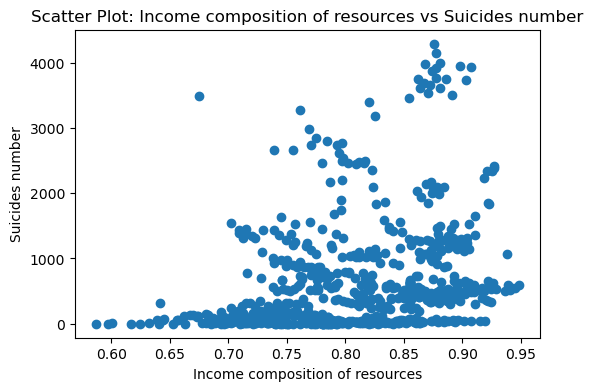

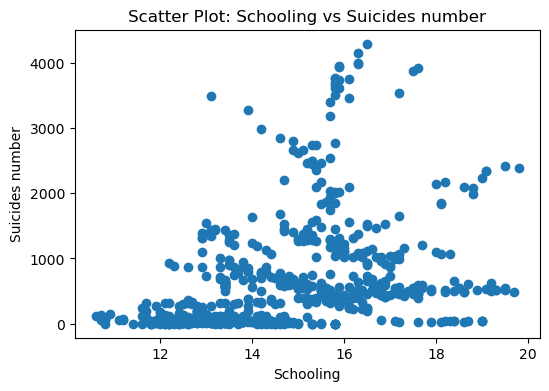

In [13]:
# Visualising the relationship between each predictor and the target using scatter plots
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df['Suicides number'])
    plt.title(f'Scatter Plot: {column} vs Suicides number')
    plt.xlabel(column)
    plt.ylabel('Suicides number')
    plt.show()

In [14]:
correlation_matrix = df.corr()
print(correlation_matrix['Suicides number'])

Suicides number                    1.000000
Life expectancy                    0.162693
Adult Mortality                   -0.003569
Infant deaths                      0.459032
Alcohol                            0.380710
Under-five deaths                  0.505052
HIV/AIDS                                NaN
GDP                                0.099265
Population                         0.208382
Income composition of resources    0.278199
Schooling                          0.347601
Name: Suicides number, dtype: float64


dropping HIV/AIDS column

In [15]:
df = df.drop(columns=['HIV/AIDS'])

# Displaying the dataset after dropping the columns
print(df.head())

   Suicides number  Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0             54.0             72.6             11.0              1     3.66   
1            119.0             73.6             14.0              1     4.25   
2            133.0             73.3             15.0              1     3.73   
3            124.0             72.8             18.0              1     4.29   
4            146.0             73.0             17.0              1     4.54   

   Under-five deaths          GDP  Population  \
0                  1  1175.788981     38927.0   
1                  1  1326.973390     36173.0   
2                  1  1453.642777      3511.0   
3                  1   189.681557    339616.0   
4                  1  2416.588235    326939.0   

   Income composition of resources  Schooling  
0                            0.656       10.7  
1                            0.662       10.6  
2                            0.670       10.7  
3                            0.6

In [16]:
# Defining  y and X for Suicides number with Infant deaths
y_infant_deaths = df['Suicides number']
X_infant_deaths = df[['Infant deaths']]

# linear regression model
model_infant_deaths = sm.OLS(y_infant_deaths, sm.add_constant(X_infant_deaths))
# Fitting the  model
results_infant_deaths = model_infant_deaths.fit()
print(results_infant_deaths.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.09e-36
Time:                        15:26:37   Log-Likelihood:                -5462.0
No. Observations:                 679   AIC:                         1.093e+04
Df Residuals:                     677   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           414.7570     34.398     12.057

In [17]:
# Defining y and X for Suicides number with Alcohol
y_alcohol = df['Suicides number']
X_alcohol = df[['Alcohol']]

# linear regression model
model_alcohol = sm.OLS(y_alcohol, sm.add_constant(X_alcohol))
# Fitting the  model
results_alcohol = model_alcohol.fit()
print(results_alcohol.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           7.64e-25
Time:                        15:26:37   Log-Likelihood:                -5489.2
No. Observations:                 679   AIC:                         1.098e+04
Df Residuals:                     677   BIC:                         1.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.5727     61.929      1.366      0.1

In [18]:
# Defining y and X for Suicides number with Under-five deaths
y_under_five_deaths = df['Suicides number']
X_under_five_deaths = df[['Under-five deaths']]

# linear regression model
model_under_five_deaths = sm.OLS(y_under_five_deaths, sm.add_constant(X_under_five_deaths))
# Fit model
results_under_five_deaths = model_under_five_deaths.fit()
# Display results
print(results_under_five_deaths.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     231.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.10e-45
Time:                        15:26:37   Log-Likelihood:                -5442.4
No. Observations:                 679   AIC:                         1.089e+04
Df Residuals:                     677   BIC:                         1.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               362.3043     34.42

In [19]:
# Define y and X for Suicides number with GDP
y_gdp = df['Suicides number']
X_gdp = df[['GDP']]

# linear regression model
model_gdp = sm.OLS(y_gdp, sm.add_constant(X_gdp))
# Fitting the linear model model
results_gdp = model_gdp.fit()
print(results_gdp.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.737
Date:                Wed, 31 Jan 2024   Prob (F-statistic):            0.00965
Time:                        15:26:37   Log-Likelihood:                -5539.0
No. Observations:                 679   AIC:                         1.108e+04
Df Residuals:                     677   BIC:                         1.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        588.2416     43.649     13.477      0.0

In [20]:
# Defining y and X for Suicides number with Life expectancy
y_life_expectancy = df['Suicides number']
X_life_expectancy = df[['Life expectancy']]

# linear regression model
model_life_expectancy = sm.OLS(y_life_expectancy, sm.add_constant(X_life_expectancy))
# Fitting model
results_life_expectancy = model_life_expectancy.fit()

print(results_life_expectancy.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     18.41
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.04e-05
Time:                        15:26:37   Log-Likelihood:                -5533.2
No. Observations:                 679   AIC:                         1.107e+04
Df Residuals:                     677   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1929.4406    605.345     

In [21]:
# Defining y and X for Suicides number with Income composition of resources
y_income_composition = df['Suicides number']
X_income_composition = df[['Income composition of resources']]

# linear regression model
model_income_composition = sm.OLS(y_income_composition, sm.add_constant(X_income_composition))
# Fittting model
results_income_composition = model_income_composition.fit()
print(results_income_composition.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     56.79
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.56e-13
Time:                        15:26:37   Log-Likelihood:                -5515.0
No. Observations:                 679   AIC:                         1.103e+04
Df Residuals:                     677   BIC:                         1.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [22]:
# Define y and X for Suicides number with Schooling
y_schooling = df['Suicides number']
X_schooling = df[['Schooling']]

# linear regression model
model_schooling = sm.OLS(y_schooling, sm.add_constant(X_schooling))
# Fitting model
results_schooling = model_schooling.fit()
print(results_schooling.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     93.04
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.02e-20
Time:                        15:26:37   Log-Likelihood:                -5498.6
No. Observations:                 679   AIC:                         1.100e+04
Df Residuals:                     677   BIC:                         1.101e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1672.1886    244.121     -6.850      0.0

In [23]:
# Define y and X for Suicides number with Schooling
y_schooling = df['Suicides number']
X_schooling = df[['Population']]

# linear regression model
model_schooling = sm.OLS(y_schooling, sm.add_constant(X_schooling))
# Fitting model
results_schooling = model_schooling.fit()
print(results_schooling.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     30.73
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.25e-08
Time:                        15:26:38   Log-Likelihood:                -5527.3
No. Observations:                 679   AIC:                         1.106e+04
Df Residuals:                     677   BIC:                         1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.7857     41.048     12.687      0.0

All the above models have very small R squared values. All those models are not good at explaining variability. Let us try using a multiple linear regression model.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# independent and dependent variables
independent_vars = ['Infant deaths', 'Alcohol', 'Under-five deaths', 'GDP', 'Life expectancy', 'Population', 'Income composition of resources', 'Schooling']
X = df[independent_vars]
y = df['Suicides number']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the model
initial_model = LinearRegression()
initial_model.fit(X_train, y_train)

# Predicting the test set
y_pred_initial = initial_model.predict(X_test)

# Calculating initial R-squared
initial_r_squared = r2_score(y_test, y_pred_initial)
print(f"Initial R-squared: {initial_r_squared}")

Initial R-squared: 0.55143092737843


In [25]:
mse_initial = mean_squared_error(y_test, y_pred_initial)
print(f"Mean Squared Error (Initial Model): {mse_initial}")

Mean Squared Error (Initial Model): 352327.75196296885


Let's generate OLS regression results to so that we can see the coefficients and p values.

In [26]:
# independent variables  and dependent variable
X = df[['Infant deaths', 'Alcohol', 'Under-five deaths', 'GDP', 'Population', 'Life expectancy', 'Income composition of resources', 'Schooling']]
y = df['Suicides number']

# Adding a constant term to the independent variables matrix
X = sm.add_constant(X)

# Creating an Ordinary Least Squares model
model = sm.OLS(endog=y, exog=X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     98.57
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          6.74e-108
Time:                        15:26:38   Log-Likelihood:                -5278.2
No. Observations:                 679   AIC:                         1.057e+04
Df Residuals:                     670   BIC:                         1.062e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems. Let's try to address multicolilinearity.

In [27]:
#  Addressing multicollinearity
dependent_var = 'Suicides number'
independent_vars = ['Infant deaths', 'Alcohol', 'Under-five deaths', 'GDP', 'Life expectancy', 'Population', 'Income composition of resources', 'Schooling']

# Checking VIF values to identify highly correlated variables
X = sm.add_constant(df[independent_vars])
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [sm.OLS(y, X.drop(columns=[var])).fit().rsquared for var in X.columns]

print(vif_data)

                          Variable       VIF
0                            const  0.697656
1                    Infant deaths  0.537259
2                          Alcohol  0.468273
3                Under-five deaths  0.505524
4                              GDP  0.539046
5                  Life expectancy  0.540601
6                       Population  0.533546
7  Income composition of resources  0.539008
8                        Schooling  0.510149


The VIF values are less than 1 which shows that there is no multicollinearity. 
This means that there are other numerical problems. 
Let us see if the problems will disappear when we drop the variables that are not significant based on the p values, and scalling Population.

In [28]:
# Dropping GDP', 'Life expectancy', and 'Income composition of resources' columns
df = df.drop(columns=['GDP', 'Life expectancy', 'Income composition of resources'])

print(df.head())

   Suicides number  Adult Mortality  Infant deaths  Alcohol  \
0             54.0             11.0              1     3.66   
1            119.0             14.0              1     4.25   
2            133.0             15.0              1     3.73   
3            124.0             18.0              1     4.29   
4            146.0             17.0              1     4.54   

   Under-five deaths  Population  Schooling  
0                  1     38927.0       10.7  
1                  1     36173.0       10.6  
2                  1      3511.0       10.7  
3                  1    339616.0       10.7  
4                  1    326939.0       10.9  


In [29]:

# Scaling population 

population_column = 'Population'

# Extract the 'Population' variable
population = df[[population_column]]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'Population' variable
df[population_column] = scaler.fit_transform(population)


In [30]:

# independent variables and dependent variable
X = df[['Infant deaths', 'Alcohol', 'Under-five deaths', 'Population', 'Schooling']]
y = df['Suicides number']

# Adding a constant term to the independent variables matrix
X = sm.add_constant(X)

# Creating an OLS model
model = sm.OLS(endog=y, exog=X)

# Fitting the model
results = model.fit()

# Printing the results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides number   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          2.23e-110
Time:                        15:26:38   Log-Likelihood:                -5280.0
No. Observations:                 679   AIC:                         1.057e+04
Df Residuals:                     673   BIC:                         1.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2394.5502    187.13

 The multicolinearity problem has been address by scalling population and ommiting the features with less significance. 

Our new multiple linear regression model has a R squared value of 0.538 which is greater than the other previous models
but it is still small. Let's try to improve it.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd


#  independent variables
independent_vars = ['Alcohol', 'Under-five deaths','Schooling', 'Population', 'Infant deaths']
X = df[independent_vars]
y = df['Suicides number']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# fitting the model
model = LinearRegression()
model.fit(X_poly, y_train)

# Predicting the test set
y_pred = model.predict(poly.transform(X_test))

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f"Improved R-squared: {r_squared}")

Improved R-squared: 0.7435775702292866


In [32]:
# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 201406.52521137137


**Interpretation of the model**

For the variable 'Infant deaths,' the coefficient is 210.5530. This suggests that, holding other variables constant, a one-unit increase in 'Infant deaths' is associated with an increase of 210.5530 units in the predicted 'Suicides number.'

Similarly, for 'Alcohol' with a coefficient of 59.2438, a one-unit increase in alcohol consumption is associated with an increase of 59.2438 units in the predicted 'Suicides number,' while holding other variables constant.

The variable 'Under-five deaths' has a coefficient of 643.8080. This implies that a one-unit increase in 'Under-five deaths' is associated with an increase of 643.8080 units in the predicted 'Suicides number,' holding other variables constant.

The 'Population' variable, has a coefficient of 74.5680. For every one-unit increase in 'Population,' we expect an increase of 74.5680 units in the predicted 'Suicides number,' holding other variables constant.

Lastly, for the 'Schooling' variable, the coefficient is 153.1249. This suggests that a one-unit increase in 'Schooling' is associated with an increase of 153.1249 units in the predicted 'Suicides number,' while keeping other variables constant.

The prediction multiple linear equation, is as follows:

Predicted Suicides number=β0 + β1xInfant deaths + β2×Alcohol + β3×Under-five deaths + β4×Populationv+ β5×Schooling

Predicted Suicides number= −2394.5502 + 210.5530×Infant deaths + 59.2438×Alcohol + 643.8080×Under-five deaths + 74.5680×Population + 153.1249×Schooling

This equation allows for the calculation of the predicted 'Suicides number' by substituting specific values for each variable based on the model's coefficient



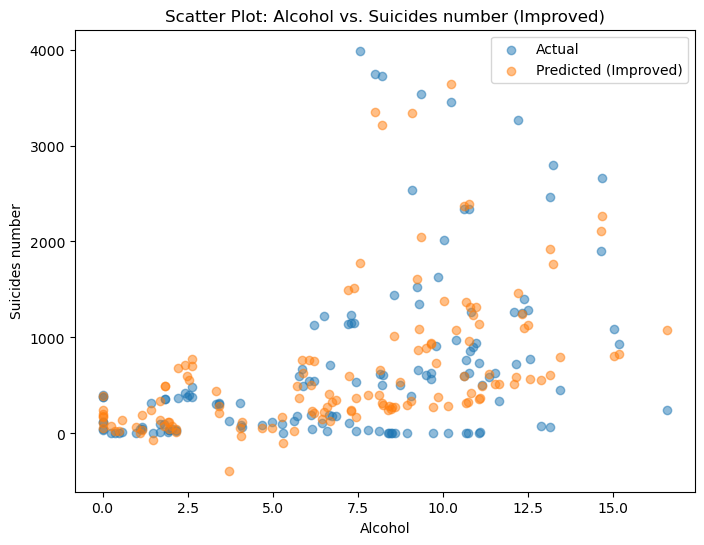

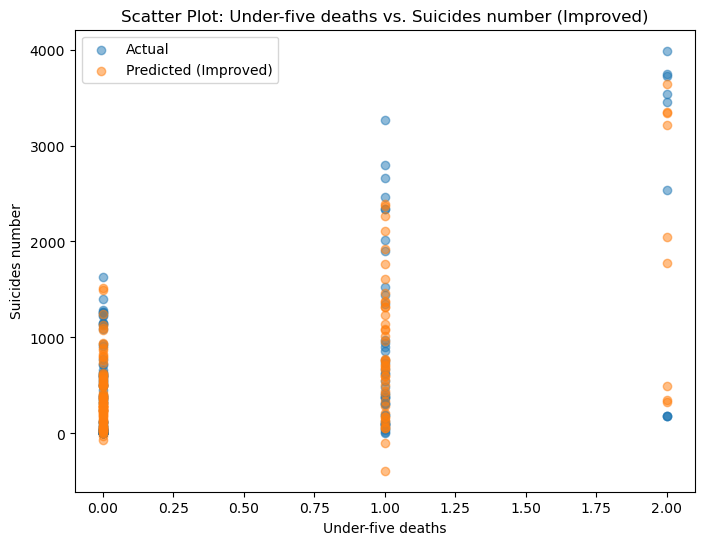

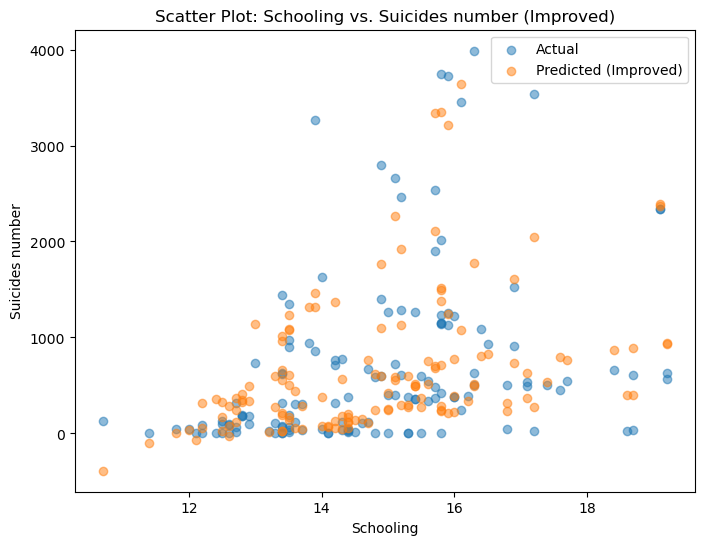

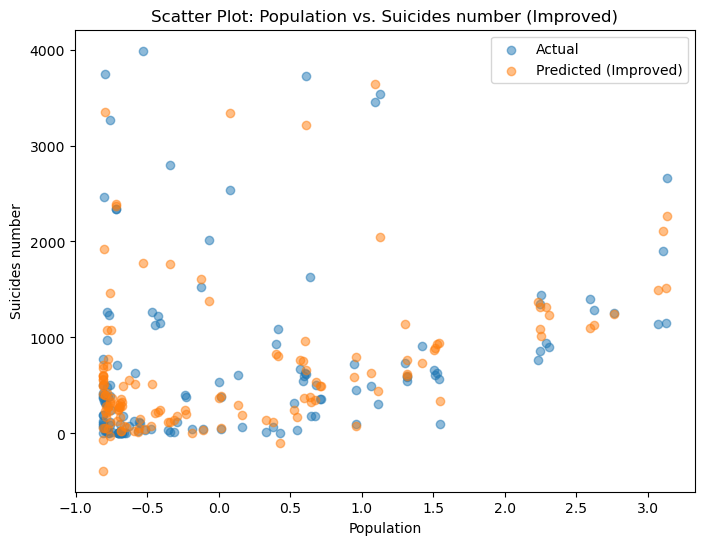

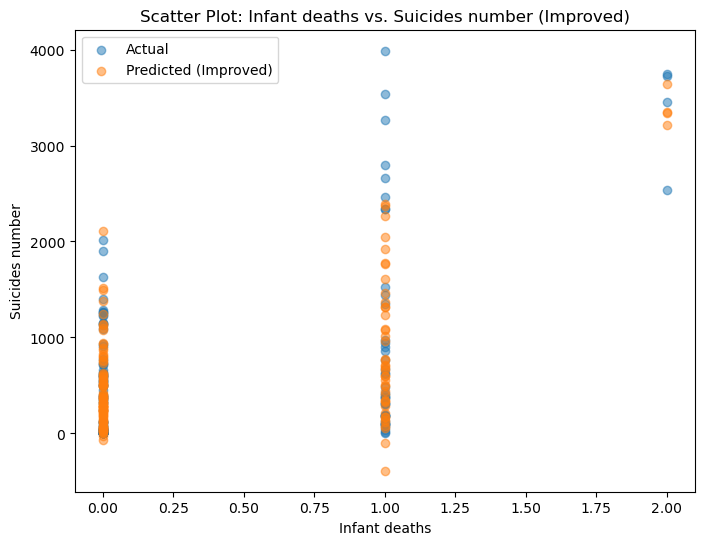

In [33]:
# Visualizing the predicted vs the actual values using scatter plots

# Extracting X_test for plotting
X_test_original = X_test.copy()  
X_test_poly = poly.transform(X_test_original)

# Predicting on the test set
y_pred = model.predict(X_test_poly)

# Plotting scatter plots for each independent variable against the dependent variable
for i, var in enumerate(independent_vars):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the original data
    plt.scatter(X_test_original[var], y_test, label='Actual', alpha=0.5)
    
    # Scatter plot of the predicted values after improvement
    plt.scatter(X_test_original[var], y_pred, label='Predicted (Improved)', alpha=0.5)
    
    plt.title(f'Scatter Plot: {var} vs. Suicides number (Improved)')
    plt.xlabel(var)
    plt.ylabel('Suicides number')
    plt.legend()
    plt.show()

These are scatter plots comparing the actual values (Actual) with the predicted values (Predicted (Improved)) for each independent variable against the dependent variable. The plots are labeled accordingly and provide visual insights into the model's performance after improvement.

**Conclusion** 

The multiple linear regression model developed for predicting 'Suicides number' provides valuable insights into the relationships between socio-economic factors and suicide rates. The analysis considered soci-economic and health variables, that is,  Infant deaths, Alcohol, Under-five deaths, Population, and  Schooling. The model's coefficients offer quantitative interpretations of the impact of each variable on the predicted 'Suicides number.

Interpreting the coefficients, an increase in Infant deaths, Alcohol, Under-five deaths, Population, or Schooling is associated with corresponding increases in the predicted Suicides number, while holding other variables constant. The prediction equation provides a tool for calculating predicted values based on specific input values.

This regression analysis aligns with the objectives of diverse stakeholders, including public health organizations, policymakers, mental health professionals, and researchers, by offering evidence-based insights into the socio-economic factors influencing suicide rates. As an ongoing collaborative effort, the aim is to empower stakeholders with actionable information for addressing mental health challenges and formulating effective strategies for prevention.


**Recommendations**
 
 Implement targeted mental health awareness programs, particularly in regions where higher 'Infant deaths' and 'Under-five deaths' are observed. These programs should address the unique challenges associated with health-related indicators.
 
 Develop evidence-based policies to address alcohol consumption, considering the significant impact identified by the 'Alcohol' variable in the analysis. This may involve regulatory measures and public awareness campaigns targeting areas with higher 
 
Invest in education and skill development initiatives, leveraging the positive association between 'Schooling' and predicted 'Suicides number.' Such initiatives can empower individuals and communities, potentially contributing to improved mental well-being

Implement interventions and support services in areas with higher populations, acknowledging the influence of 'Population' on suicide rates. Tailored strategies can address the unique socio-economic dynamics of densely populated regions.

Encourage collaboration among public health organizations, policymakers, mental health professionals, educators, and researchers. This interdisciplinary approach ensures a comprehensive understanding of the socio-economic factors influencing suicide rates and facilitates the development of effective strategies.

Establish a systematic process for regular monitoring and evaluation of implemented interventions and policies. This ongoing assessment will provide insights into the effectiveness of strategies and allow for timely adjustments based on evolving socio-economic dynamics
